# Comprehensive Customer Analysis using K-Means Clustering

## Project Overview

This project utilizes real-world transaction data from a UK-based online retailer (2009–2010) to uncover valuable insights about customer behavior using **K-means clustering**, an unsupervised machine learning algorithm.

The analysis focuses on **RFM analysis**, which leverages three key features derived from the customer data:
1.  **Recency:** The number of days since the client's last purchase.
2.  **Frequency:** The total number of purchases/unique invoices made by the client.
3.  **Monetary Value:** The sum total monetary contribution (in British Pounds Sterling) of each client.

## Setup and Dependencies

The following packages are required for data manipulation, visualization, and clustering. They can be installed via `pip requirements.txt`:

```python
pandas
matplotlib
seaborn
scikit-learn
openpyxl

Note: openpyxl is specifically required as an engine for the pandas library to successfully read the Excel file format containing the data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Setting to make numbers easier to read on display
pd.options.display.float_format = '{:20.2f}'.format

# Show all columns on output
pd.set_option("display.max_columns", 999)

# Data Exploration

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Importing dataset

file_path = '/content/drive/My Drive/Online Retail.xlsx'

df = pd.read_excel(file_path)

df.head(10)

Mounted at /content/drive


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.00,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.00,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.00,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.00,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.00,United Kingdom


# Data Exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.00,541909,541909.00,406829.00
mean,9.55,2011-07-04 13:34:57.156386048,4.61,15287.69
min,-80995.00,2010-12-01 08:26:00,-11062.06,12346.00
25%,1.00,2011-03-28 11:34:00,1.25,13953.00
50%,3.00,2011-07-19 17:17:00,2.08,15152.00
75%,10.00,2011-10-19 11:27:00,4.13,16791.00
max,80995.00,2011-12-09 12:50:00,38970.00,18287.00
std,218.08,NaN,96.76,1713.60


In [ ]:
df.describe(include = "O")

,InvoiceNo,StockCode,Description,Country
count,541909,541909,540455,541909
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


In [ ]:
df[df["CustomerID"].isna()].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2010-12-01 14:32:00,0.43,NaN,United Kingdom


In [ ]:
df[df["Quantity"] < 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.00,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.00,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.00,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom


In [ ]:
df["InvoiceNo"] = df["InvoiceNo"].astype("str")
df[df["InvoiceNo"].str.match("^\\d{6}$") == False]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.00,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.00,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.00,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.00,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.00,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.00,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.00,United Kingdom


In [ ]:
df["InvoiceNo"].str.replace("[0-9]", "", regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [ ]:
df[df["InvoiceNo"].str.startswith("A")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [ ]:
df["StockCode"] = df["StockCode"].astype("str")
df[(df["StockCode"].str.match("^\\d{5}$") == False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False)]["StockCode"].unique()

array(['POST', 'D', 'C2', 'DOT', 'M', 'BANK CHARGES', 'S', 'AMAZONFEE',
       'DCGS0076', 'DCGS0003', 'gift_0001_40', 'DCGS0070', 'm',
       'gift_0001_50', 'gift_0001_30', 'gift_0001_20', 'DCGS0055',
       'DCGS0072', 'DCGS0074', 'DCGS0069', 'DCGS0057', 'DCGSSBOY',
       'DCGSSGIRL', 'gift_0001_10', 'PADS', 'DCGS0004', 'DCGS0073',
       'DCGS0071', 'DCGS0068', 'DCGS0067', 'DCGS0066P', 'B', 'CRUK'],
      dtype=object)

In [ ]:
df[df["StockCode"].str.contains("^DOT")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1814,536544,DOT,DOTCOM POSTAGE,1,2010-12-01 14:32:00,569.77,NaN,United Kingdom
3041,536592,DOT,DOTCOM POSTAGE,1,2010-12-01 17:06:00,607.49,NaN,United Kingdom
5450,536862,DOT,DOTCOM POSTAGE,1,2010-12-03 11:13:00,254.43,NaN,United Kingdom
5545,536864,DOT,DOTCOM POSTAGE,1,2010-12-03 11:27:00,121.06,NaN,United Kingdom
5685,536865,DOT,DOTCOM POSTAGE,1,2010-12-03 11:28:00,498.47,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
536834,581219,DOT,DOTCOM POSTAGE,1,2011-12-08 09:28:00,1008.96,NaN,United Kingdom
537254,581238,DOT,DOTCOM POSTAGE,1,2011-12-08 10:53:00,1683.75,NaN,United Kingdom
539368,581439,DOT,DOTCOM POSTAGE,1,2011-12-08 16:30:00,938.59,NaN,United Kingdom
540908,581492,DOT,DOTCOM POSTAGE,1,2011-12-09 10:03:00,933.17,NaN,United Kingdom


In [ ]:
df[df["StockCode"].str.contains("^D")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.00,United Kingdom
1814,536544,DOT,DOTCOM POSTAGE,1,2010-12-01 14:32:00,569.77,NaN,United Kingdom
3041,536592,DOT,DOTCOM POSTAGE,1,2010-12-01 17:06:00,607.49,NaN,United Kingdom
5450,536862,DOT,DOTCOM POSTAGE,1,2010-12-03 11:13:00,254.43,NaN,United Kingdom
5545,536864,DOT,DOTCOM POSTAGE,1,2010-12-03 11:27:00,121.06,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
536834,581219,DOT,DOTCOM POSTAGE,1,2011-12-08 09:28:00,1008.96,NaN,United Kingdom
537254,581238,DOT,DOTCOM POSTAGE,1,2011-12-08 10:53:00,1683.75,NaN,United Kingdom
539368,581439,DOT,DOTCOM POSTAGE,1,2011-12-08 16:30:00,938.59,NaN,United Kingdom
540908,581492,DOT,DOTCOM POSTAGE,1,2011-12-09 10:03:00,933.17,NaN,United Kingdom


In [ ]:
df[df["StockCode"].str.contains("^C2")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1423,536540,C2,CARRIAGE,1,2010-12-01 14:05:00,50.00,14911.00,EIRE
12119,537368,C2,CARRIAGE,1,2010-12-06 12:40:00,50.00,14911.00,EIRE
12452,537378,C2,CARRIAGE,1,2010-12-06 13:06:00,50.00,14911.00,EIRE
19975,537963,C2,CARRIAGE,1,2010-12-09 11:30:00,50.00,13369.00,United Kingdom
20016,538002,C2,CARRIAGE,1,2010-12-09 11:48:00,50.00,14932.00,Channel Islands
...,...,...,...,...,...,...,...,...
515000,579768,C2,CARRIAGE,1,2011-11-30 15:08:00,50.00,14911.00,EIRE
516484,579910,C2,CARRIAGE,1,2011-12-01 08:52:00,50.00,14911.00,EIRE
518854,580124,C2,CARRIAGE,1,2011-12-01 17:12:00,50.00,NaN,EIRE
518905,580127,C2,CARRIAGE,1,2011-12-01 17:51:00,50.00,14911.00,EIRE


In [ ]:
df[df["StockCode"].str.contains("^POST")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583.00,France
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.00,12791.00,Netherlands
1123,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.00,12662.00,Germany
5073,536840,POST,POSTAGE,1,2010-12-02 18:27:00,18.00,12738.00,Germany
5258,536852,POST,POSTAGE,1,2010-12-03 09:51:00,18.00,12686.00,France
...,...,...,...,...,...,...,...,...
541198,581493,POST,POSTAGE,1,2011-12-09 10:10:00,15.00,12423.00,Belgium
541216,581494,POST,POSTAGE,2,2011-12-09 10:13:00,18.00,12518.00,Germany
541730,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.00,12662.00,Germany
541767,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.00,12526.00,Germany


In [ ]:
df[df["StockCode"].str.contains("^M")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2239,536569,M,Manual,1,2010-12-01 15:35:00,1.25,16274.00,United Kingdom
2250,536569,M,Manual,1,2010-12-01 15:35:00,18.95,16274.00,United Kingdom
5684,536865,M,Manual,1,2010-12-03 11:28:00,2.55,NaN,United Kingdom
6798,536981,M,Manual,2,2010-12-03 14:26:00,0.85,14723.00,United Kingdom
7976,537077,M,Manual,12,2010-12-05 11:59:00,0.42,17062.00,United Kingdom
...,...,...,...,...,...,...,...,...
531432,580956,M,Manual,4,2011-12-06 14:23:00,1.25,17841.00,United Kingdom
533082,C581009,M,Manual,-1,2011-12-07 09:15:00,125.00,16971.00,United Kingdom
534308,C581145,M,Manual,-1,2011-12-07 13:48:00,9.95,17490.00,United Kingdom
538321,581405,M,Manual,3,2011-12-08 13:50:00,0.42,13521.00,United Kingdom


In [ ]:
df[df["StockCode"].str.contains("^BANK CHARGES")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4406,536779,BANK CHARGES,Bank Charges,1,2010-12-02 15:08:00,15.00,15823.00,United Kingdom
14435,C537572,BANK CHARGES,Bank Charges,-1,2010-12-07 12:00:00,95.38,NaN,United Kingdom
28992,C538680,BANK CHARGES,Bank Charges,-1,2010-12-13 17:10:00,966.92,NaN,United Kingdom
62508,541505,BANK CHARGES,Bank Charges,1,2011-01-18 15:58:00,15.00,15939.00,United Kingdom
64573,C541653,BANK CHARGES,Bank Charges,-1,2011-01-20 11:50:00,1050.15,NaN,United Kingdom
90558,C544049,BANK CHARGES,Bank Charges,-1,2011-02-15 12:39:00,566.37,NaN,United Kingdom
96675,C544575,BANK CHARGES,Bank Charges,-1,2011-02-21 13:58:00,134.76,NaN,United Kingdom
96676,C544576,BANK CHARGES,Bank Charges,-1,2011-02-21 14:01:00,149.16,NaN,United Kingdom
96715,C544584,BANK CHARGES,Bank Charges,-1,2011-02-21 14:52:00,109.84,NaN,United Kingdom
112233,C545887,BANK CHARGES,Bank Charges,-1,2011-03-07 15:54:00,326.68,NaN,United Kingdom


In [ ]:
df[df["StockCode"].str.contains("^S")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
14436,C537581,S,SAMPLES,-1,2010-12-07 12:03:00,12.95,NaN,United Kingdom
14437,C537581,S,SAMPLES,-1,2010-12-07 12:03:00,52.00,NaN,United Kingdom
96680,C544580,S,SAMPLES,-1,2011-02-21 14:25:00,5.74,NaN,United Kingdom
96681,C544580,S,SAMPLES,-1,2011-02-21 14:25:00,11.08,NaN,United Kingdom
96682,C544580,S,SAMPLES,-1,2011-02-21 14:25:00,5.79,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
414147,C572347,S,SAMPLES,-1,2011-10-24 11:03:00,33.05,NaN,United Kingdom
419666,572849,S,SAMPLES,1,2011-10-26 12:20:00,33.05,NaN,United Kingdom
480961,C577330,S,SAMPLES,-1,2011-11-18 14:16:00,2.89,NaN,United Kingdom
480962,C577330,S,SAMPLES,-1,2011-11-18 14:16:00,75.00,NaN,United Kingdom


In [ ]:
df[df["StockCode"].str.contains("^AMAZONFEE")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
14514,C537600,AMAZONFEE,AMAZON FEE,-1,2010-12-07 12:41:00,1.00,NaN,United Kingdom
15016,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04:00,13541.33,NaN,United Kingdom
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom
16232,C537644,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:34:00,13474.79,NaN,United Kingdom
16313,C537647,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:41:00,5519.25,NaN,United Kingdom
16356,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom
16357,C537652,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:51:00,6706.71,NaN,United Kingdom
43702,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:55:00,16888.02,NaN,United Kingdom
43703,C540118,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:57:00,16453.71,NaN,United Kingdom
96844,C544587,AMAZONFEE,AMAZON FEE,-1,2011-02-21 15:07:00,5575.28,NaN,United Kingdom


In [ ]:
#array(['POST', 'D', 'C2', 'DOT', 'M', 'BANK CHARGES', 'S', 'AMAZONFEE',
 #      'DCGS0076', 'DCGS0003', 'gift_0001_40', 'DCGS0070', 'm',
  #     'gift_0001_50', 'gift_0001_30', 'gift_0001_20', 'DCGS0055',
   #    'DCGS0072', 'DCGS0074', 'DCGS0069', 'DCGS0057', 'DCGSSBOY',
    #   'DCGSSGIRL', 'gift_0001_10', 'PADS', 'DCGS0004', 'DCGS0073',
     #  'DCGS0071', 'DCGS0068', 'DCGS0067', 'DCGS0066P', 'B', 'CRUK'],
      #dtype=object)

df[df["StockCode"].str.contains("^DCGS0076")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
21326,538071,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,1,2010-12-09 14:09:00,16.13,NaN,United Kingdom
39313,539631,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,2,2010-12-20 15:03:00,16.13,NaN,United Kingdom


In [ ]:
df[df["StockCode"].str.contains("^DCGS0003")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
24906,538349,DCGS0003,BOXED GLASS ASHTRAY,1,2010-12-10 14:59:00,2.51,NaN,United Kingdom
36460,539451,DCGS0003,BOXED GLASS ASHTRAY,1,2010-12-17 16:59:00,2.51,NaN,United Kingdom
76251,542622,DCGS0003,BOXED GLASS ASHTRAY,1,2011-01-31 09:09:00,2.46,NaN,United Kingdom
176006,551995,DCGS0003,BOXED GLASS ASHTRAY,1,2011-05-05 15:42:00,2.46,NaN,United Kingdom
279258,561256,DCGS0003,ebay,-7,2011-07-26 11:53:00,0.00,NaN,United Kingdom


In [ ]:
df[df["StockCode"].str.contains("^gift_0001_40")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
38248,539492,gift_0001_40,Dotcomgiftshop Gift Voucher £40.00,1,2010-12-20 10:14:00,34.04,NaN,United Kingdom
145463,548893,gift_0001_40,Dotcomgiftshop Gift Voucher £40.00,1,2011-04-04 15:54:00,33.33,NaN,United Kingdom
281008,561513,gift_0001_40,Dotcomgiftshop Gift Voucher £40.00,1,2011-07-27 15:12:00,33.33,NaN,United Kingdom


In [ ]:
df[df["StockCode"].str.contains("^DCGS0070")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
40052,539718,DCGS0070,CAMOUFLAGE DOG COLLAR,1,2010-12-21 13:06:00,12.72,NaN,United Kingdom
279253,561251,DCGS0070,NaN,-8,2011-07-26 11:51:00,0.00,NaN,United Kingdom


In [ ]:
df[df["StockCode"].str.contains("^m")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
40383,539736,m,Manual,1,2010-12-21 15:18:00,2.55,NaN,United Kingdom


In [ ]:
df[df["StockCode"].str.contains("^gift_0001_50")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
42057,539958,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00,1,2010-12-23 13:26:00,42.55,NaN,United Kingdom
178556,552232,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00,1,2011-05-06 15:54:00,41.67,NaN,United Kingdom
239744,558066,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00,1,2011-06-24 15:45:00,41.67,NaN,United Kingdom
245516,558614,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00,1,2011-06-30 15:56:00,41.67,NaN,United Kingdom


In [ ]:
df[df["StockCode"].str.contains("^gift_0001_30")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
44725,540238,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2011-01-05 14:44:00,25.53,NaN,United Kingdom
94054,544323,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2011-02-17 15:51:00,25.00,NaN,United Kingdom
95034,544434,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2011-02-18 16:12:00,25.00,NaN,United Kingdom
208808,555149,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2011-05-31 15:49:00,25.00,NaN,United Kingdom
297099,562933,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2011-08-10 16:51:00,25.00,NaN,United Kingdom
317442,564760,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2011-08-30 10:47:00,25.00,NaN,United Kingdom
317500,564761,gift_0001_30,NaN,30,2011-08-30 10:48:00,0.00,NaN,United Kingdom
322164,565231,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2011-09-02 09:26:00,25.00,NaN,United Kingdom


In [ ]:
df[df["StockCode"].str.contains("^gift_0001_20")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
44794,540238,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2011-01-05 14:44:00,17.02,NaN,United Kingdom
55589,540995,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2011-01-13 09:30:00,16.67,NaN,United Kingdom
91278,544089,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2011-02-15 17:51:00,16.67,NaN,United Kingdom
161388,550474,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,2,2011-04-18 13:58:00,16.67,NaN,United Kingdom
163440,550542,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2011-04-19 11:37:00,16.67,NaN,United Kingdom
228807,556955,gift_0001_20,to push order througha s stock was,10,2011-06-16 09:04:00,0.00,NaN,United Kingdom
234137,557500,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2011-06-20 15:27:00,16.67,NaN,United Kingdom
239899,558068,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2011-06-24 15:51:00,16.67,NaN,United Kingdom
291036,562420,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2011-08-04 16:38:00,16.67,NaN,United Kingdom
431349,573585,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2011-10-31 14:41:00,16.67,NaN,United Kingdom


In [ ]:
df[df["StockCode"].str.contains("^DCGS0055")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
74825,542529,DCGS0055,NaN,-1,2011-01-28 13:08:00,0.00,NaN,United Kingdom


In [ ]:
df[df["StockCode"].str.contains("^DCGS0072")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
74838,542531,DCGS0072,NaN,-1,2011-01-28 13:08:00,0.00,NaN,United Kingdom


In [ ]:
df[df["StockCode"].str.contains("^DCGS0074")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
74839,542532,DCGS0074,NaN,-1,2011-01-28 13:09:00,0.00,NaN,United Kingdom


In [ ]:
df[df["StockCode"].str.contains("^DCGS0069")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
75053,542541,DCGS0069,OOH LA LA DOGS COLLAR,1,2011-01-28 14:25:00,15.79,NaN,United Kingdom
279254,561252,DCGS0069,ebay,-5,2011-07-26 11:52:00,0.00,NaN,United Kingdom


In [ ]:
df[df["StockCode"].str.contains("^DCGS0057")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
75295,542582,DCGS0057,NaN,-6,2011-01-28 15:01:00,0.00,NaN,United Kingdom


In [ ]:
df[df["StockCode"].str.contains("^DCGSSBOY")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
84016,543358,DCGSSBOY,BOYS PARTY BAG,1,2011-02-07 14:04:00,3.29,NaN,United Kingdom
97246,544599,DCGSSBOY,BOYS PARTY BAG,1,2011-02-21 18:15:00,3.29,NaN,United Kingdom
112723,545897,DCGSSBOY,BOYS PARTY BAG,5,2011-03-07 17:22:00,3.29,NaN,United Kingdom
116891,546306,DCGSSBOY,BOYS PARTY BAG,1,2011-03-10 16:16:00,3.29,NaN,United Kingdom
128107,547249,DCGSSBOY,BOYS PARTY BAG,6,2011-03-22 09:27:00,3.29,NaN,United Kingdom
160487,550458,DCGSSBOY,BOYS PARTY BAG,1,2011-04-18 13:13:00,3.29,NaN,United Kingdom
178669,552234,DCGSSBOY,BOYS PARTY BAG,7,2011-05-06 16:01:00,3.29,NaN,United Kingdom
262771,559923,DCGSSBOY,BOYS PARTY BAG,20,2011-07-13 16:07:00,3.29,NaN,United Kingdom
278378,561209,DCGSSBOY,BOYS PARTY BAG,2,2011-07-25 16:57:00,1.25,NaN,United Kingdom
365966,568716,DCGSSBOY,BOYS PARTY BAG,2,2011-09-28 16:13:00,3.29,NaN,United Kingdom


In [ ]:
df[df["StockCode"].str.contains("^DCGSSGIRL")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
84017,543358,DCGSSGIRL,GIRLS PARTY BAG,3,2011-02-07 14:04:00,3.29,NaN,United Kingdom
112724,545897,DCGSSGIRL,GIRLS PARTY BAG,5,2011-03-07 17:22:00,3.29,NaN,United Kingdom
116892,546306,DCGSSGIRL,GIRLS PARTY BAG,2,2011-03-10 16:16:00,3.29,NaN,United Kingdom
128108,547249,DCGSSGIRL,GIRLS PARTY BAG,17,2011-03-22 09:27:00,3.29,NaN,United Kingdom
128269,547250,DCGSSGIRL,GIRLS PARTY BAG,2,2011-03-22 09:30:00,3.29,NaN,United Kingdom
150864,549524,DCGSSGIRL,GIRLS PARTY BAG,1,2011-04-08 15:42:00,3.29,NaN,United Kingdom
176169,551997,DCGSSGIRL,GIRLS PARTY BAG,2,2011-05-05 15:47:00,3.29,NaN,United Kingdom
178670,552234,DCGSSGIRL,GIRLS PARTY BAG,2,2011-05-06 16:01:00,3.29,NaN,United Kingdom
278379,561209,DCGSSGIRL,GIRLS PARTY BAG,5,2011-07-25 16:57:00,1.25,NaN,United Kingdom
297098,562933,DCGSSGIRL,GIRLS PARTY BAG,5,2011-08-10 16:51:00,3.29,NaN,United Kingdom


In [ ]:
df[df["StockCode"].str.contains("^gift_0001_10")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
112442,545895,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2011-03-07 17:14:00,8.33,NaN,United Kingdom
163439,550542,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2011-04-19 11:37:00,8.33,NaN,United Kingdom
191910,553387,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2011-05-16 16:33:00,8.33,NaN,United Kingdom
192071,553389,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2011-05-16 16:37:00,8.33,NaN,United Kingdom
245515,558614,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2011-06-30 15:56:00,8.33,NaN,United Kingdom
317441,564760,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2011-08-30 10:47:00,8.33,NaN,United Kingdom
317501,564762,gift_0001_10,NaN,30,2011-08-30 10:48:00,0.00,NaN,United Kingdom
320440,564974,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,2,2011-08-31 15:32:00,8.33,NaN,United Kingdom
536047,581217,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2011-12-08 09:20:00,8.33,NaN,United Kingdom


In [ ]:
df[df["StockCode"].str.contains("^PADS")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-04-15 09:27:00,0.00,13952.00,United Kingdom
279045,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-07-26 10:13:00,0.00,15618.00,United Kingdom
358655,568158,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 12:22:00,0.00,16133.00,United Kingdom
359871,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 14:58:00,0.00,16198.00,United Kingdom


In [ ]:
df[df["StockCode"].str.contains("^DCGS0004")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
170783,551340,DCGS0004,HAYNES CAMPER SHOULDER BAG,1,2011-04-27 17:23:00,16.63,NaN,United Kingdom


In [ ]:
df[df["StockCode"].str.contains("^DCGS0066P")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
279257,561255,DCGS0066P,NaN,-3,2011-07-26 11:52:00,0.00,NaN,United Kingdom


In [ ]:
df[df["StockCode"].str.contains("^DCGS0067")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
279256,561254,DCGS0067,ebay,-11,2011-07-26 11:52:00,0.00,NaN,United Kingdom


In [ ]:
df[df["StockCode"].str.contains("^DCGS0068")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
279255,561253,DCGS0068,ebay,-10,2011-07-26 11:52:00,0.00,NaN,United Kingdom


In [ ]:
df[df["StockCode"].str.contains("^DCGS0071")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
279252,561250,DCGS0071,NaN,-2,2011-07-26 11:51:00,0.00,NaN,United Kingdom


In [ ]:
df[df["StockCode"].str.contains("^DCGS0073")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
279251,561249,DCGS0073,ebay,-4,2011-07-26 11:51:00,0.00,NaN,United Kingdom


In [ ]:
df[df["StockCode"].str.contains("^B")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4406,536779,BANK CHARGES,Bank Charges,1,2010-12-02 15:08:00,15.00,15823.00,United Kingdom
14435,C537572,BANK CHARGES,Bank Charges,-1,2010-12-07 12:00:00,95.38,NaN,United Kingdom
28992,C538680,BANK CHARGES,Bank Charges,-1,2010-12-13 17:10:00,966.92,NaN,United Kingdom
62508,541505,BANK CHARGES,Bank Charges,1,2011-01-18 15:58:00,15.00,15939.00,United Kingdom
64573,C541653,BANK CHARGES,Bank Charges,-1,2011-01-20 11:50:00,1050.15,NaN,United Kingdom
90558,C544049,BANK CHARGES,Bank Charges,-1,2011-02-15 12:39:00,566.37,NaN,United Kingdom
96675,C544575,BANK CHARGES,Bank Charges,-1,2011-02-21 13:58:00,134.76,NaN,United Kingdom
96676,C544576,BANK CHARGES,Bank Charges,-1,2011-02-21 14:01:00,149.16,NaN,United Kingdom
96715,C544584,BANK CHARGES,Bank Charges,-1,2011-02-21 14:52:00,109.84,NaN,United Kingdom
112233,C545887,BANK CHARGES,Bank Charges,-1,2011-03-07 15:54:00,326.68,NaN,United Kingdom


In [ ]:
df[df["StockCode"].str.contains("^CRUK")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
317508,C564763,CRUK,CRUK Commission,-1,2011-08-30 10:49:00,1.60,14096.00,United Kingdom
324023,C565382,CRUK,CRUK Commission,-1,2011-09-02 15:45:00,13.01,14096.00,United Kingdom
333779,C566216,CRUK,CRUK Commission,-1,2011-09-09 15:17:00,15.96,14096.00,United Kingdom
338848,C566565,CRUK,CRUK Commission,-1,2011-09-13 12:32:00,52.24,14096.00,United Kingdom
351003,C567655,CRUK,CRUK Commission,-1,2011-09-21 14:40:00,608.66,14096.00,United Kingdom
361603,C568345,CRUK,CRUK Commission,-1,2011-09-26 15:28:00,447.56,14096.00,United Kingdom
372785,C569245,CRUK,CRUK Commission,-1,2011-10-03 09:57:00,361.59,14096.00,United Kingdom
390002,C570487,CRUK,CRUK Commission,-1,2011-10-10 17:12:00,411.92,14096.00,United Kingdom
401767,C571440,CRUK,CRUK Commission,-1,2011-10-17 13:31:00,495.98,14096.00,United Kingdom
416464,C572551,CRUK,CRUK Commission,-1,2011-10-24 17:07:00,425.14,14096.00,United Kingdom


# Data Cleaning

Initial data exploration revealed several issues requiring cleaning before feature engineering:

**Key Data Issues Identified**



*   **Missing Customer ID:** Significant number of records (about 103,000) were missing Customer ID. Records without a customer ID were dropped because inferring customer identity is nearly impossible.
*   **Negative Values:** Quantity and Price columns contained unexpected negative values.


*   **Invoice Types:** Invoice numbers starting with 'C' indicate cancellations. Invoice numbers starting with 'A' indicate accounting transactions (e.g., bad debt adjustments). Both types were filtered out.
*   **Stock Codes:** The majority of stock codes were expected to be five-digit integral numbers. However, many non-standard codes were found (e.g., 'POST', 'M' for manual, 'D' for discount). After systematic review, only the stock code pattern containing the word 'pads' was deemed representative of legit transactions and retained.

In [ ]:
cleaned_df = df.copy()

In [ ]:
cleaned_df["InvoiceNo"] = cleaned_df["InvoiceNo"].astype("str")

mask = (cleaned_df["InvoiceNo"].str.match("^\\d{6}$") == True)

cleaned_df = cleaned_df[mask]

cleaned_df

/tmp/ipython-input-3161452181.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["InvoiceNo"] = cleaned_df["InvoiceNo"].astype("str")


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.00,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.00,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.00,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.00,France


In [ ]:
cleaned_df["StockCode"] = cleaned_df["StockCode"].astype("str")

mask = (
    (cleaned_df["StockCode"].str.match("^\d{5}") == True)
    | (cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True)
    | (cleaned_df["StockCode"].str.match("^PADS$") == True)
)

cleaned_df = cleaned_df[mask]

cleaned_df

<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2450800286.py:4: SyntaxWarning: invalid escape sequence '\d'
  (cleaned_df["StockCode"].str.match("^\d{5}") == True)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.00,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.00,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.00,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.00,France


In [ ]:
cleaned_df.dropna (subset=["CustomerID"], inplace=True)

/tmp/ipython-input-69656942.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna (subset=["CustomerID"], inplace=True)


In [ ]:
cleaned_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,396374.00,396374,396374.00,396374.00
mean,13.05,2011-07-11 00:04:48.847805440,2.87,15301.60
min,1.00,2010-12-01 08:26:00,0.00,12346.00
25%,2.00,2011-04-07 11:16:00,1.25,13975.00
50%,6.00,2011-07-31 14:39:00,1.95,15159.00
75%,12.00,2011-10-20 14:41:00,3.75,16803.00
max,80995.00,2011-12-09 12:50:00,649.50,18287.00
std,180.73,NaN,4.26,1709.98


In [ ]:
len(cleaned_df[cleaned_df["UnitPrice"] == 0])

34

In [ ]:
cleaned_df = cleaned_df[cleaned_df["UnitPrice"] > 0.0]

In [ ]:
len(cleaned_df)/len(df)

0.7313774083840645

**Data Loss Summary**: After applying cleaning steps (dropping null customers, filtering non-standard invoices, and removing zero-priced items), the total loss of data was 27% of Records.



# Feature Engineering

In [ ]:
cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"] * cleaned_df["UnitPrice"]

cleaned_df

/tmp/ipython-input-1090960200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"] * cleaned_df["UnitPrice"]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SalesLineTotal
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.00,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.00,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.00,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.00,France,16.60


In [ ]:
aggregated_df = cleaned_df.groupby(by = "CustomerID", as_index=False) \
  .agg(
      MonetaryValue=("SalesLineTotal", "sum"),
      Frequency=("InvoiceNo", "nunique"),
      LastInvoiceDate = ("InvoiceDate", "max")
  )

aggregated_df

,CustomerID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.00,77183.60,1,2011-01-18 10:01:00
1,12347.00,4310.00,7,2011-12-07 15:52:00
2,12348.00,1437.24,4,2011-09-25 13:13:00
3,12349.00,1457.55,1,2011-11-21 09:51:00
4,12350.00,294.40,1,2011-02-02 16:01:00
...,...,...,...,...
4329,18280.00,180.60,1,2011-03-07 09:52:00
4330,18281.00,80.82,1,2011-06-12 10:53:00
4331,18282.00,178.05,2,2011-12-02 11:43:00
4332,18283.00,2088.93,16,2011-12-06 12:02:00


In [ ]:
max_invoice_date = aggregated_df["LastInvoiceDate"].max()

aggregated_df["Recency"] = (max_invoice_date - aggregated_df["LastInvoiceDate"]).dt.days

aggregated_df.head()

,CustomerID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.00,77183.60,1,2011-01-18 10:01:00,325
1,12347.00,4310.00,7,2011-12-07 15:52:00,1
2,12348.00,1437.24,4,2011-09-25 13:13:00,74
3,12349.00,1457.55,1,2011-11-21 09:51:00,18
4,12350.00,294.40,1,2011-02-02 16:01:00,309


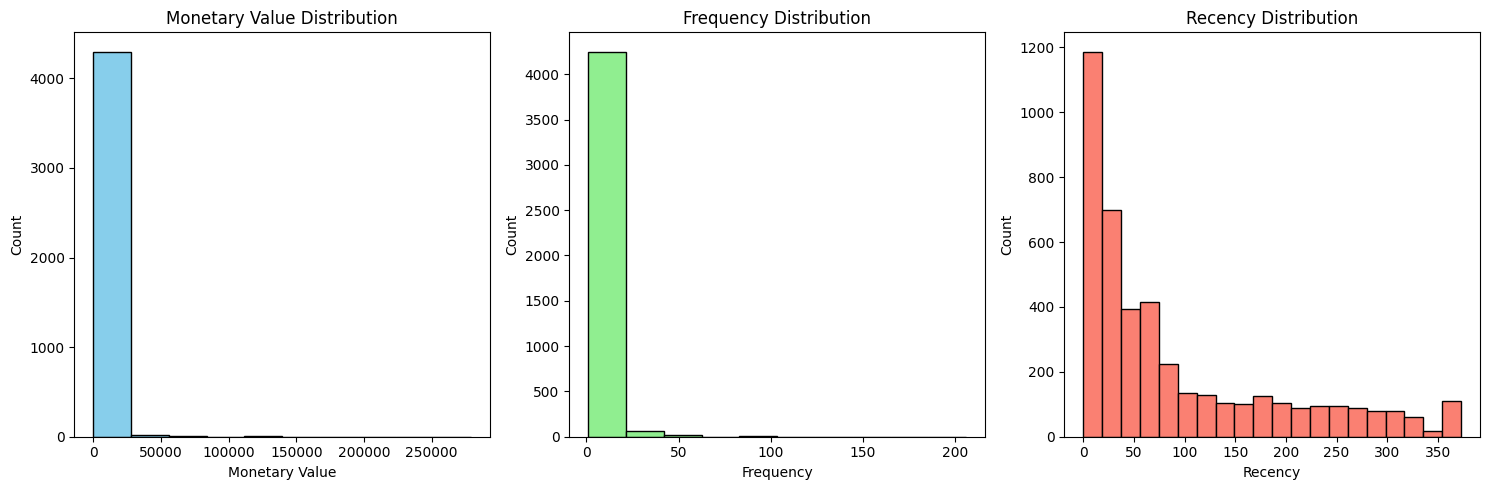

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(aggregated_df['MonetaryValue'], bins=10, color='skyblue', edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(aggregated_df['Frequency'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(aggregated_df['Recency'], bins=20, color='salmon', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


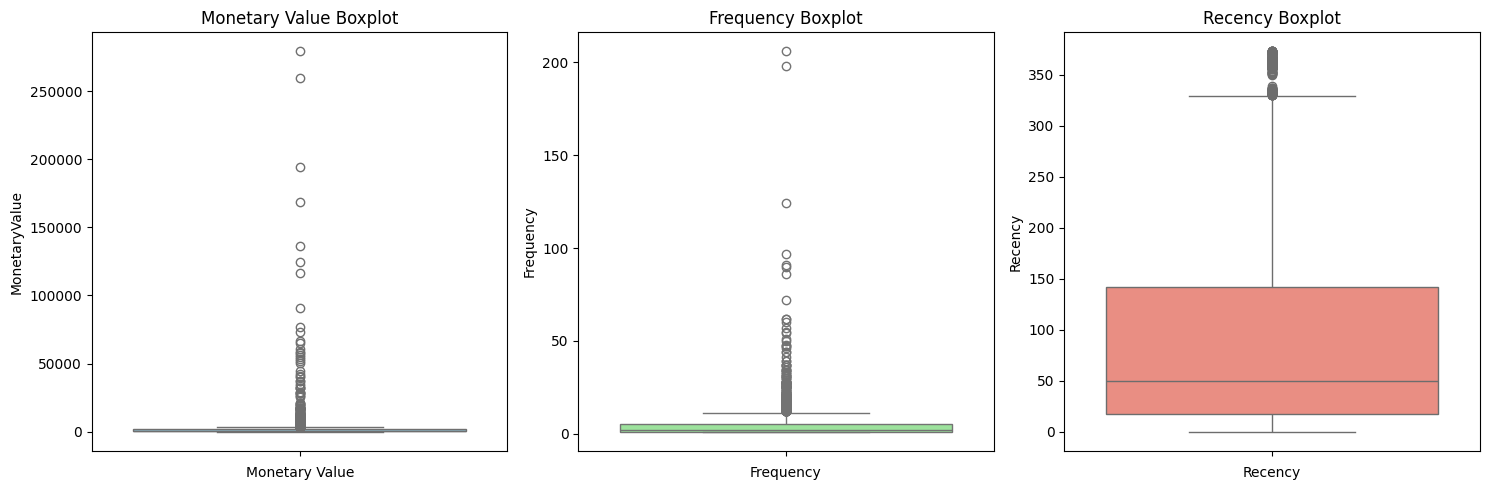

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=aggregated_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=aggregated_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=aggregated_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()


### Outlier Handling Strategy
Extreme outlier data in Monetary Value and Frequency is separated from the main dataset before K-means was applied. This was necessary because outliers are often the most valuable customers, and dropping them would harm the analysis, but including them would skew the K-means algorithm.
The outliers were manually segregated into three categories based on the intersection of frequency and monetary outlier indices: Monetary Only Outliers (High Spenders, average Frequency/Recency), Frequency Only Outliers (High Frequency, low/average Monetary Value), and Monetary & Frequency Outliers (High Spenders AND High Frequency).

In [ ]:
M_Q1 = aggregated_df["MonetaryValue"].quantile(0.25)
M_Q3 = aggregated_df["MonetaryValue"].quantile(0.75)
M_IQR = M_Q3 - M_Q1

monetary_outliers_df = aggregated_df[
    (aggregated_df["MonetaryValue"] < (M_Q1 - 1.5 * M_IQR)) |
    (aggregated_df["MonetaryValue"] > (M_Q3 + 1.5 * M_IQR))
]

monetary_outliers_df.describe()


,CustomerID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,425.00,425.00,425.00,425,425.00
mean,15033.64,12568.00,16.65,2011-11-14 08:29:09.741176576,24.72
min,12346.00,3622.68,1.00,2010-12-02 15:27:00,0.00
25%,13324.00,4359.32,8.00,2011-11-15 14:22:00,3.00
50%,15005.00,5891.61,12.00,2011-11-29 12:09:00,10.00
75%,16655.00,9430.52,19.00,2011-12-06 12:09:00,23.00
max,18251.00,279138.02,206.00,2011-12-09 12:49:00,371.00
std,1797.85,26097.90,19.07,NaN,47.08


In [ ]:
F_Q1 = aggregated_df['Frequency'].quantile(0.25)
F_Q3 = aggregated_df['Frequency'].quantile(0.75)
F_IQR = F_Q3 - F_Q1

frequency_outliers_df = aggregated_df[(aggregated_df['Frequency'] > (F_Q3 + 1.5 * F_IQR))]

frequency_outliers_df.describe()

,CustomerID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,278.00,278.00,278.00,278,278.00
mean,15355.67,14488.01,23.09,2011-11-25 21:49:19.640287744,13.17
min,12395.00,1296.44,12.00,2010-12-02 15:27:00,0.00
25%,13880.25,4197.77,13.00,2011-11-23 20:17:15,2.00
50%,15290.50,6283.52,17.00,2011-12-03 13:42:00,5.50
75%,16781.25,11040.84,25.00,2011-12-07 12:15:30,15.00
max,18283.00,279138.02,206.00,2011-12-09 12:49:00,371.00
std,1745.00,30142.78,21.17,NaN,30.37


In [ ]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) & (~aggregated_df.index.isin(frequency_outliers_df))]

non_outliers_df.describe()

,CustomerID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3909.00,3909.00,3909.00,3909,3909.00
mean,15328.13,874.82,2.90,2011-09-01 00:43:20.583269376,98.99
min,12348.00,3.75,1.00,2010-12-01 09:53:00,0.00
25%,13856.00,282.19,1.00,2011-07-04 16:06:00,21.00
50%,15339.00,579.00,2.00,2011-10-12 11:40:00,58.00
75%,16803.00,1226.89,4.00,2011-11-17 18:43:00,157.00
max,18287.00,3619.17,39.00,2011-12-09 12:50:00,373.00
std,1711.30,815.21,2.58,NaN,101.71


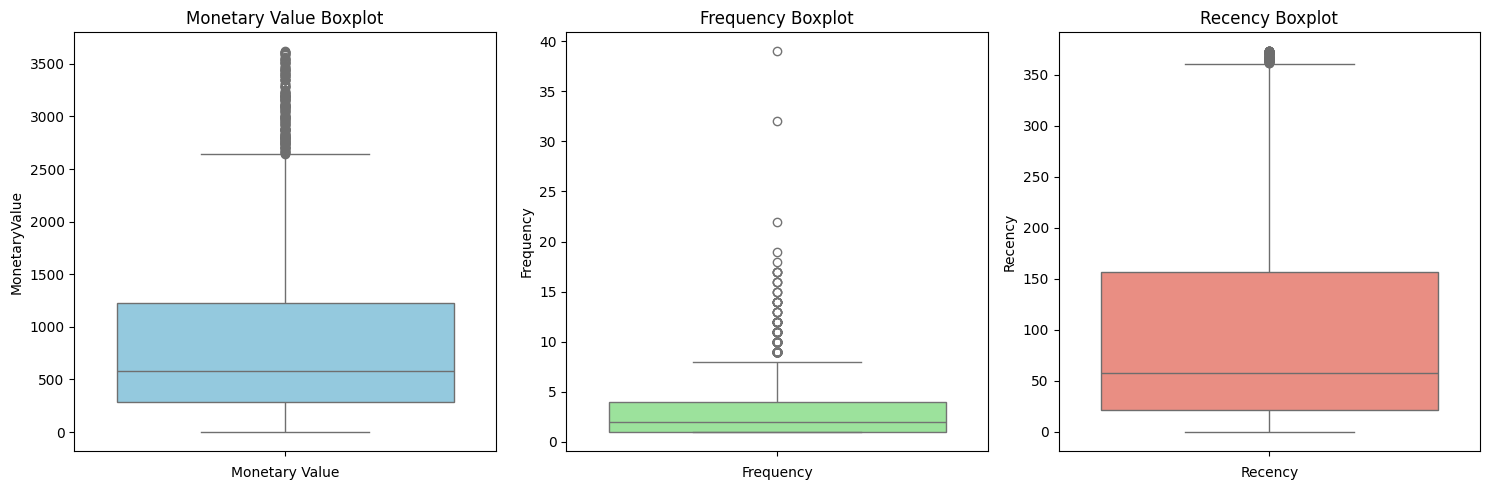

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=non_outliers_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=non_outliers_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=non_outliers_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

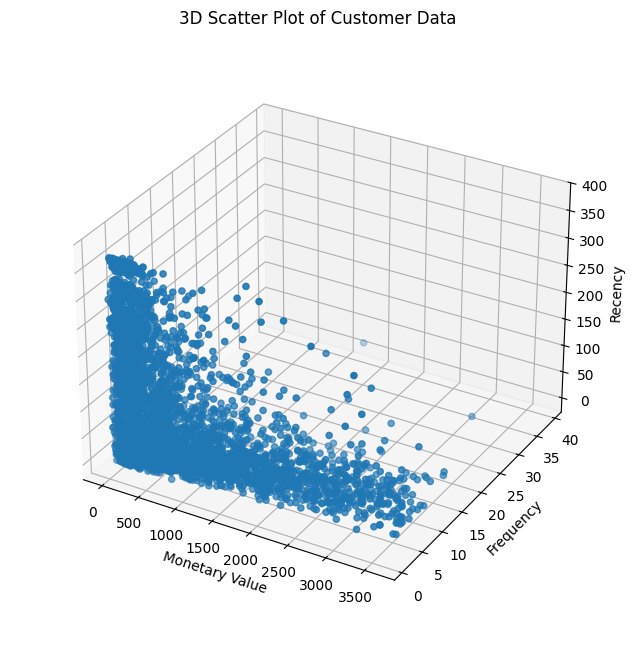

In [ ]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outliers_df['MonetaryValue'], non_outliers_df['Frequency'], non_outliers_df['Recency'])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_box_aspect(None, zoom=0.9)

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()


K-means is highly sensitive to the scale of features. Without scaling, features with large magnitudes (like Monetary Value, which is in the thousands) would disproportionately influence centroid positioning compared to smaller features (like Frequency, which is in the tens).

**Standard Scaling (Z-score)** is used to transform features to have a mean of zero and a standard deviation of one. This ensures each feature contributes equally to the analysis.

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(non_outliers_df[["MonetaryValue", "Frequency", "Recency"]])

scaled_data


array([[ 0.69000155,  0.42764365, -0.24567617],
       [ 0.71491867, -0.73619415, -0.79631761],
       [-0.7120806 , -0.73619415,  2.06505128],
       ...,
       [-0.85482346, -0.34824822, -0.90447932],
       [ 1.48952109,  5.08299483, -0.94381085],
       [ 1.18078673,  0.03969772, -0.56032842]])

In [ ]:
scaled_data_df = pd.DataFrame(scaled_data, index=non_outliers_df.index,
                              columns=("MonetaryValue", "Frequency", "Recency"))

scaled_data_df

,MonetaryValue,Frequency,Recency
2,0.69,0.43,-0.25
3,0.71,-0.74,-0.80
4,-0.71,-0.74,2.07
5,0.63,1.59,-0.63
6,-0.96,-0.74,1.02
...,...,...,...
4329,-0.85,-0.74,1.75
4330,-0.97,-0.74,0.80
4331,-0.85,-0.35,-0.90
4332,1.49,5.08,-0.94


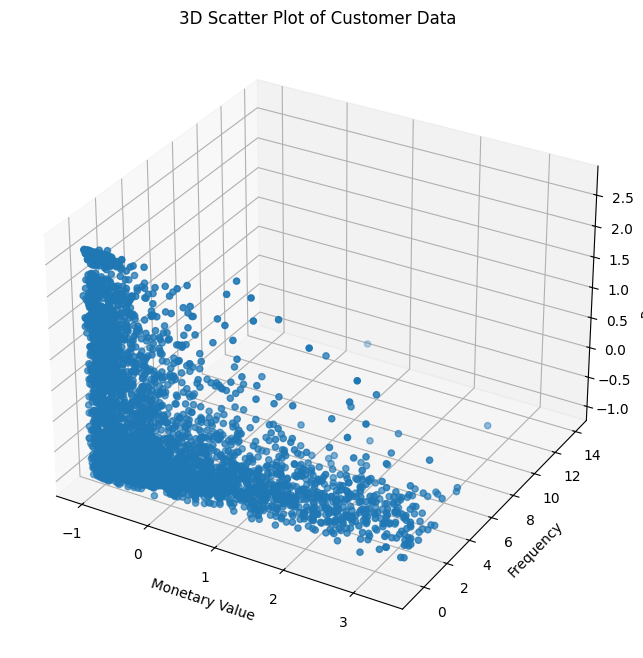

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(
    scaled_data_df["MonetaryValue"],
    scaled_data_df["Frequency"],
    scaled_data_df["Recency"]
)

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

# KMeans Clustering

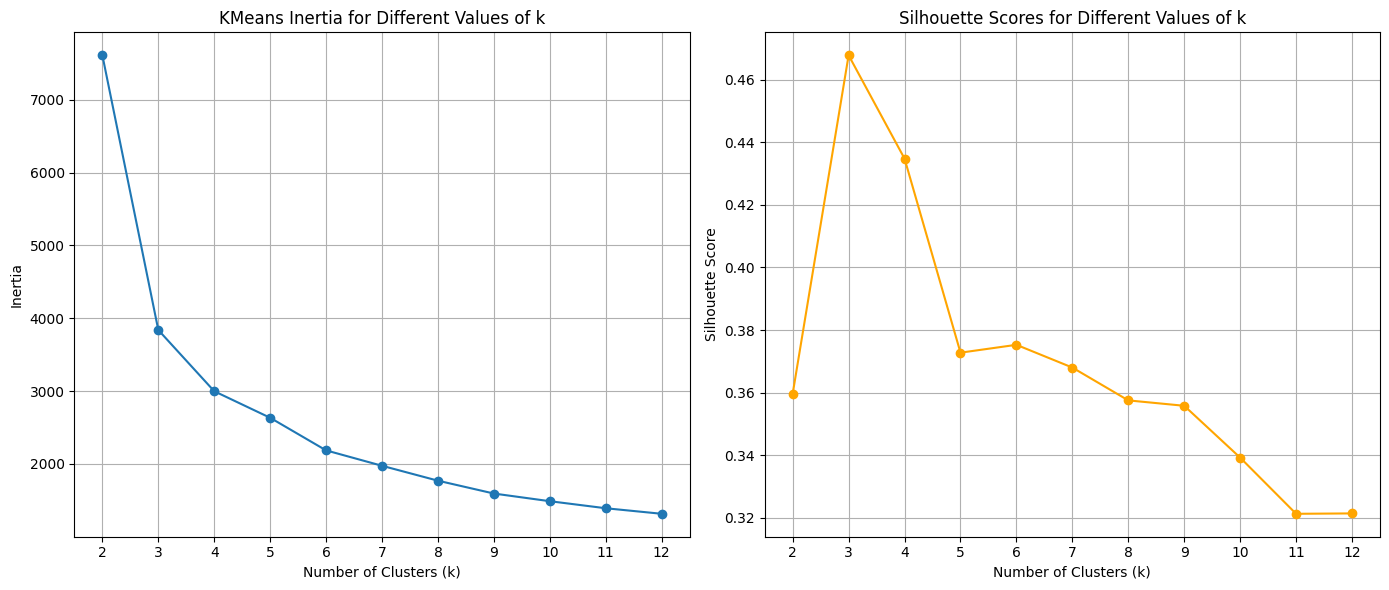

In [ ]:
max_k = 12

inertia = []
silhoutte_scores = []
k_values = range(2, max_k + 1)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)

    cluster_labels = kmeans.fit_predict(scaled_data_df)

    sil_score = silhouette_score(scaled_data_df, cluster_labels)

    silhoutte_scores.append(sil_score)

    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14, 6))

# Left plot: inertia
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

# Right plot: silhouette scores
plt.subplot(1, 2, 2)
plt.plot(k_values, silhoutte_scores, marker='o', color="orange")
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

### Determining K (Number of Clusters)
Two metrics were used to determine the optimal number of clusters (K) for the non-outlier data:
1. **Elbow Method (Inertia):** Inertia is the average distance between points and their cluster center. The goal is to find the "elbow" point where the reduction in inertia starts to slow down significantly. Analysis suggested K=3 or K=4.
2. **Silhouette Score:** Used as a tie-breaker, this score ranges from -1 to 1. A higher score indicates better cluster separation and less overlap. The score suggested that K=3 had better separation than K=4, and using fewer clusters is generally preferred to reduce complexity.

In [ ]:
# Run KMeans with k=3
kmeans = KMeans(n_clusters=3, random_state=42, max_iter=1000)

# Fit and predict cluster labels
cluster_labels = kmeans.fit_predict(scaled_data_df)

# Display the resulting labels
cluster_labels

array([0, 0, 1, ..., 0, 2, 2], dtype=int32)

In [ ]:
# Add the cluster labels as a new column
non_outliers_df["Cluster"] = cluster_labels

# Display the updated DataFrame
non_outliers_df

/tmp/ipython-input-1493333050.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df["Cluster"] = cluster_labels


,CustomerID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
2,12348.00,1437.24,4,2011-09-25 13:13:00,74,0
3,12349.00,1457.55,1,2011-11-21 09:51:00,18,0
4,12350.00,294.40,1,2011-02-02 16:01:00,309,1
5,12352.00,1385.74,7,2011-11-03 14:37:00,35,2
6,12353.00,89.00,1,2011-05-19 17:47:00,203,1
...,...,...,...,...,...,...
4329,18280.00,180.60,1,2011-03-07 09:52:00,277,1
4330,18281.00,80.82,1,2011-06-12 10:53:00,180,1
4331,18282.00,178.05,2,2011-12-02 11:43:00,7,0
4332,18283.00,2088.93,16,2011-12-06 12:02:00,3,2


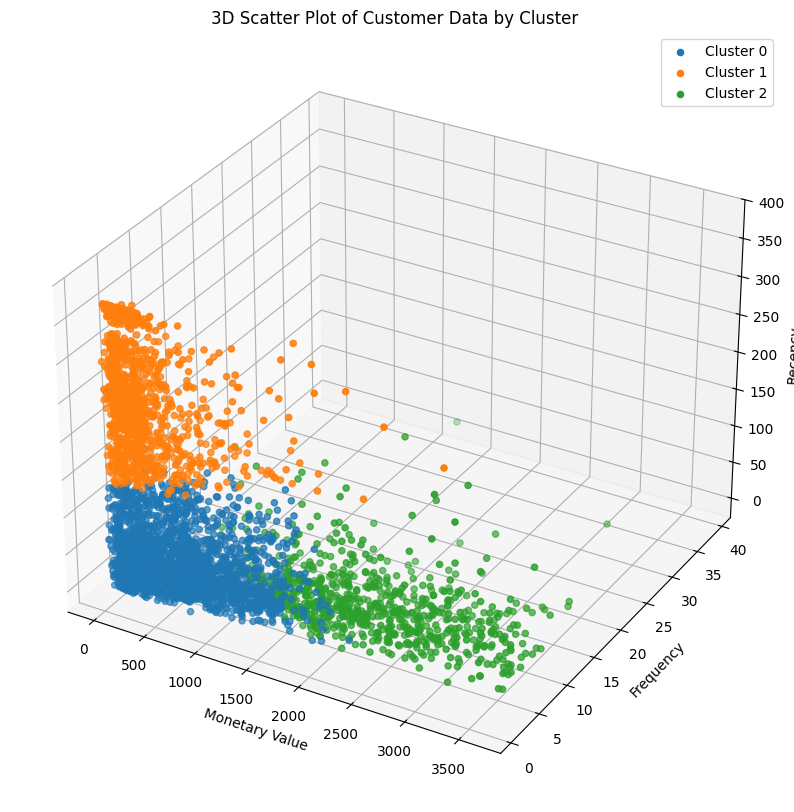

In [ ]:
from mpl_toolkits.mplot3d import Axes3D  # required for 3D plotting

# Define colors for 3 clusters
cluster_colors = {
    0: '#1f77b4',  # Blue
    1: '#ff7f0e',  # Orange
    2: '#2ca02c'   # Green
}

# Map cluster numbers to colors
colors = non_outliers_df['Cluster'].map(cluster_colors)

# Create a 3D figure
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

# Plot clusters
scatter = ax.scatter(
    non_outliers_df['MonetaryValue'],
    non_outliers_df['Frequency'],
    non_outliers_df['Recency'],
    c=colors,
    marker='o'
)

# Set labels and title
ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('3D Scatter Plot of Customer Data by Cluster')

# Optional: add legend
for cluster, color in cluster_colors.items():
    ax.scatter([], [], [], color=color, label=f'Cluster {cluster}')
ax.legend()

# Show the plot
plt.show()


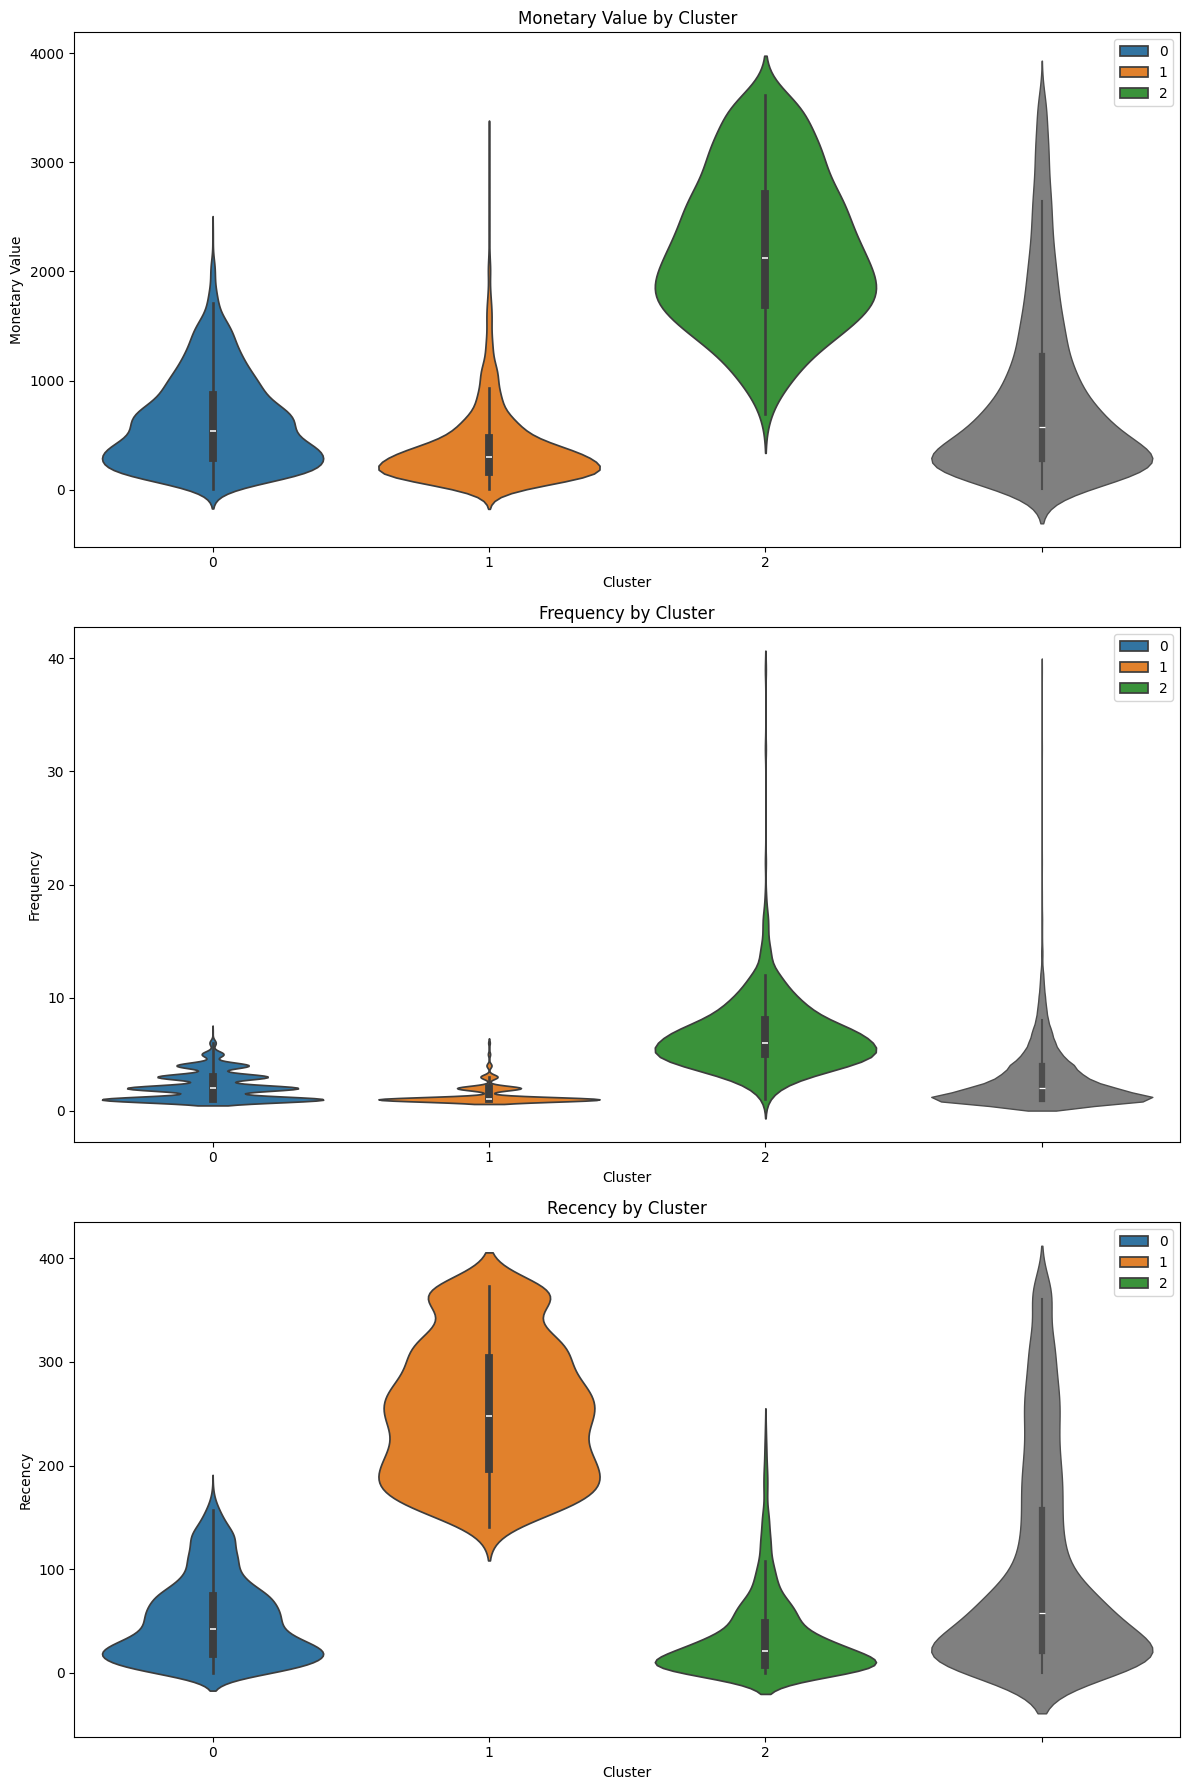

In [ ]:
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['MonetaryValue'], palette=cluster_colors, hue = non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Frequency'], palette=cluster_colors, hue = non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Recency'], palette=cluster_colors, hue = non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

1. **Cluster 0 (Blue): “Potential Loyalists”**

*   **Rationale:** These customers purchase somewhat regularly and have moderate spending levels. They’ve shown engagement but aren’t yet your top-tier buyers. With the right encouragement, they can become loyal customers.
*   **Action:** Focus on nurturing them with personalized recommendations, loyalty rewards, and targeted promotions to increase purchase frequency and spending.

2. **Cluster 1 (Orange): “At-Risk Customers”**

*   **Rationale:** This segment consists of customers who haven’t purchased recently, buy infrequently, and have low spending. They are likely inactive or close to churning.
*   **Action:** Re-engage them through win-back campaigns, discounts, and tailored communication to regain their interest and bring them back.

3. **Cluster 2 (Green): “Loyal Customers”**

*   **Rationale:** These are your most valuable customers—they purchase frequently, spend the most, and have bought recently. They are the backbone of your customer base.
*   **Action:** Maintain their loyalty through VIP programs, early access to new products, and personalized offers to strengthen long-term relationships.

In [ ]:
overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index)

monetary_only_outliers = monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers = frequency_outliers_df.drop(overlap_indices)
monetary_and_frequency_outliers = monetary_outliers_df.loc[overlap_indices]

monetary_only_outliers["Cluster"] = -1
frequency_only_outliers["Cluster"] = -2
monetary_and_frequency_outliers["Cluster"] = -3

outlier_clusters_df = pd.concat(
    [monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers]
)

outlier_clusters_df

,CustomerID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,77183.60,1,2011-01-18 10:01:00,325,-1
1,12347.00,4310.00,7,2011-12-07 15:52:00,1,-1
10,12357.00,6207.67,1,2011-11-06 16:07:00,32,-1
12,12359.00,6372.58,4,2011-10-13 12:47:00,57,-1
15,12362.00,4737.23,10,2011-12-06 15:40:00,2,-1
...,...,...,...,...,...,...
4248,18172.00,7561.68,20,2011-11-25 11:12:00,14,-3
4268,18198.00,5425.56,17,2011-12-05 14:49:00,3,-3
4287,18223.00,6484.54,14,2011-12-05 09:11:00,4,-3
4289,18225.00,5509.12,12,2011-12-06 13:27:00,2,-3


/tmp/ipython-input-176550764.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['MonetaryValue'],
/tmp/ipython-input-176550764.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Frequency'],
/tmp/ipython-input-176550764.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Recency'],


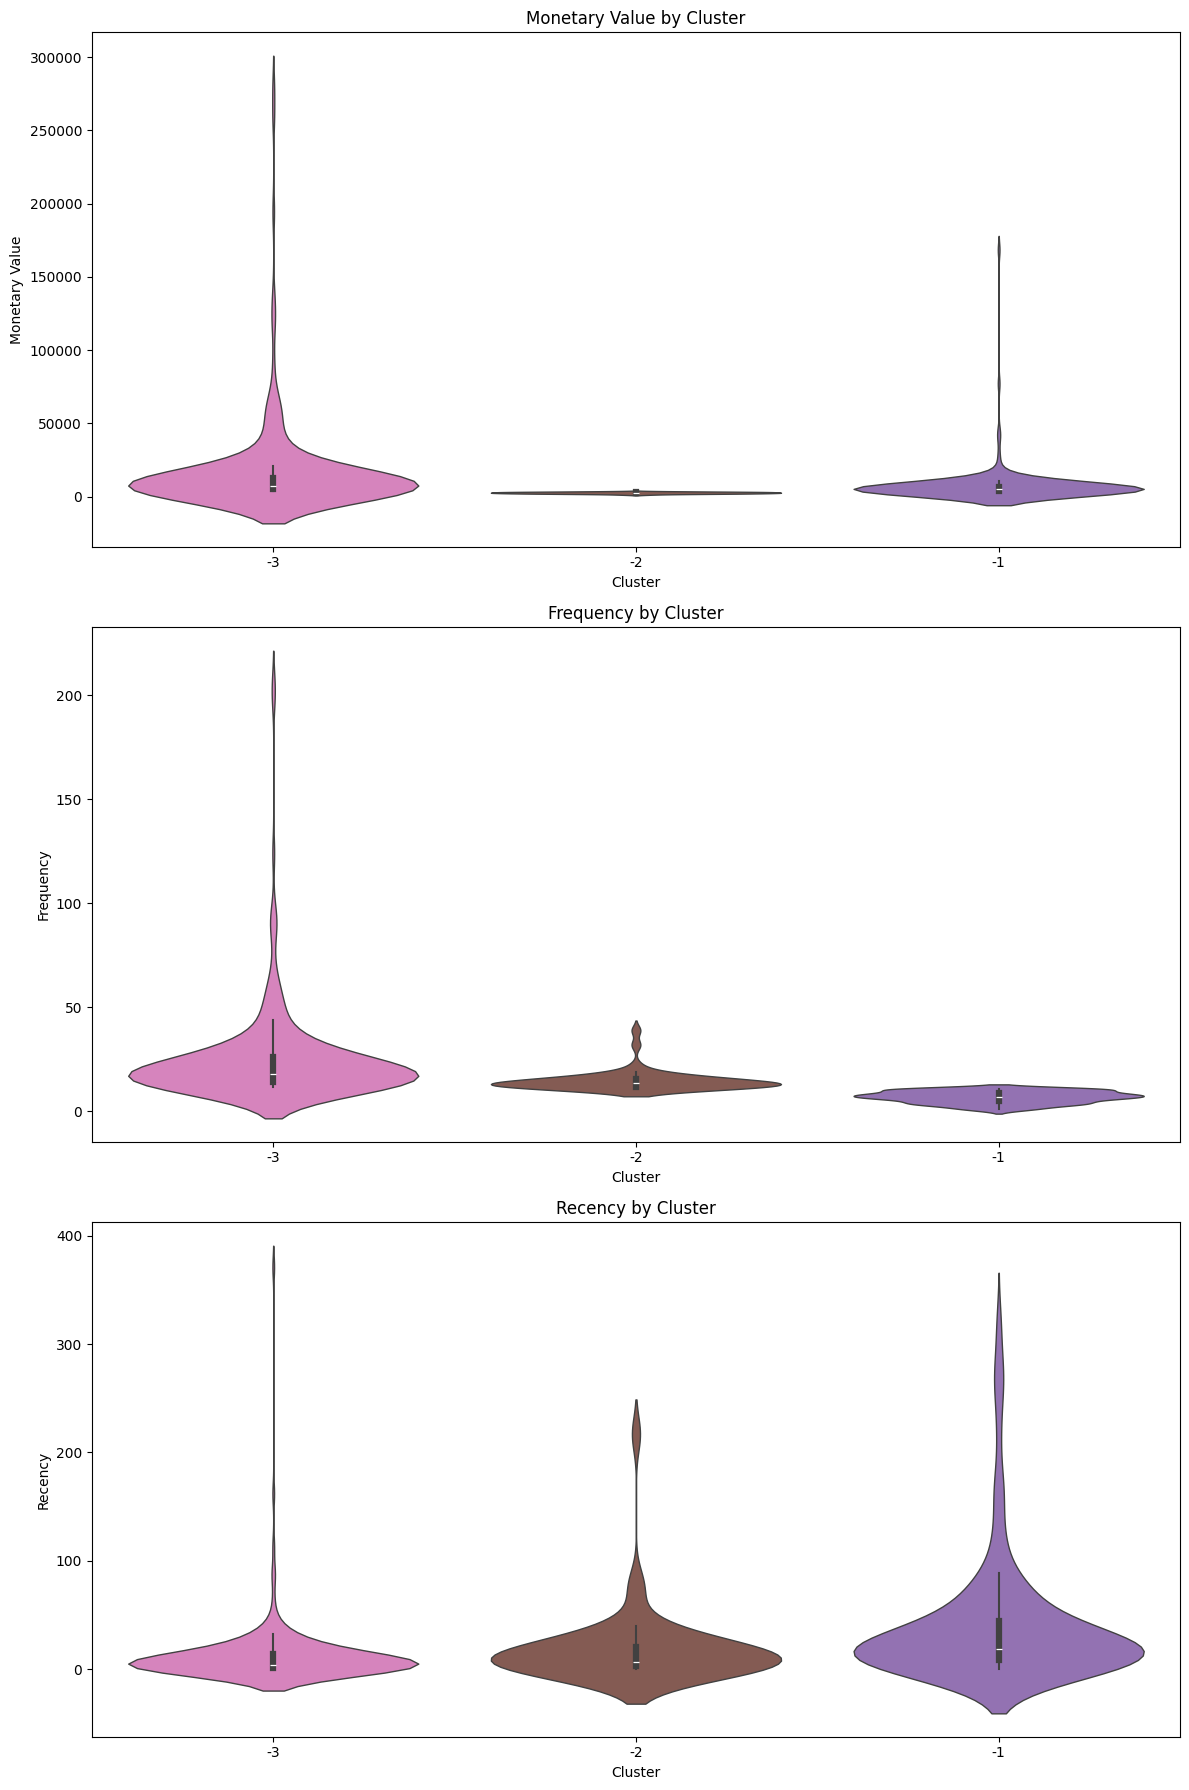

In [ ]:
cluster_colors = {str(k): v for k, v in {
    -1: '#9467bd',
    -2: '#8c564b',
    -3: '#e377c2'
}.items()}

plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['MonetaryValue'],
               palette=cluster_colors, color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Frequency'],
               palette=cluster_colors, color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Recency'],
               palette=cluster_colors, color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()


**Cluster −3 (Monetary & Frequency Outliers) : "Elite Customers"**

This group represents the high-value, high-activity customers. They have exceptionally high monetary and frequency scores, along with low recency, meaning they buy often and spend significantly. These are your top-tier loyal customers, forming the most profitable segment. They should be nurtured through VIP programs, personalized rewards, or exclusive services to sustain engagement and retention.

**Cluster −2 (Recency Outliers) : "Dormant Customers"**

 Customers in this cluster exhibit high recency values, indicating long gaps since their last purchase, alongside lower frequency and monetary levels. They are dormant or at-risk customers, possibly slipping away from active engagement. A re-engagement strategy, such as targeted win-back campaigns, special discounts, or reminder emails, could help reactivate their interest.

**Cluster −1 (Low-Monetary Outliers) : "Newcomers"**

 This segment shows low spending and low frequency, though recency varies. They are primarily new, one-time, or low-value customers who have not yet developed consistent purchasing habits. To grow their potential, focus on awareness and onboarding campaigns, product recommendations, and loyalty incentives that can move them toward repeat engagement.

In [ ]:
cluster_labels = {
    0: "Potential Loyalists",
    1: "At-Risk Customers",
    2: "Loyal Customers",
    -1: "Elite Customers",
    -2: "Dormant Customers",
    -3: "Newcomers"
}


In [ ]:
full_clustering_df = pd.concat([non_outliers_df, outlier_clusters_df])

full_clustering_df

,CustomerID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
2,12348.00,1437.24,4,2011-09-25 13:13:00,74,0
3,12349.00,1457.55,1,2011-11-21 09:51:00,18,0
4,12350.00,294.40,1,2011-02-02 16:01:00,309,1
5,12352.00,1385.74,7,2011-11-03 14:37:00,35,2
6,12353.00,89.00,1,2011-05-19 17:47:00,203,1
...,...,...,...,...,...,...
4248,18172.00,7561.68,20,2011-11-25 11:12:00,14,-3
4268,18198.00,5425.56,17,2011-12-05 14:49:00,3,-3
4287,18223.00,6484.54,14,2011-12-05 09:11:00,4,-3
4289,18225.00,5509.12,12,2011-12-06 13:27:00,2,-3


In [ ]:
full_clustering_df["ClusterLabel"] = full_clustering_df["Cluster"].map(cluster_labels)

full_clustering_df

,CustomerID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel
2,12348.00,1437.24,4,2011-09-25 13:13:00,74,0,Potential Loyalists
3,12349.00,1457.55,1,2011-11-21 09:51:00,18,0,Potential Loyalists
4,12350.00,294.40,1,2011-02-02 16:01:00,309,1,At-Risk Customers
5,12352.00,1385.74,7,2011-11-03 14:37:00,35,2,Loyal Customers
6,12353.00,89.00,1,2011-05-19 17:47:00,203,1,At-Risk Customers
...,...,...,...,...,...,...,...
4248,18172.00,7561.68,20,2011-11-25 11:12:00,14,-3,Newcomers
4268,18198.00,5425.56,17,2011-12-05 14:49:00,3,-3,Newcomers
4287,18223.00,6484.54,14,2011-12-05 09:11:00,4,-3,Newcomers
4289,18225.00,5509.12,12,2011-12-06 13:27:00,2,-3,Newcomers


# Visualization

/tmp/ipython-input-1131753007.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=None)


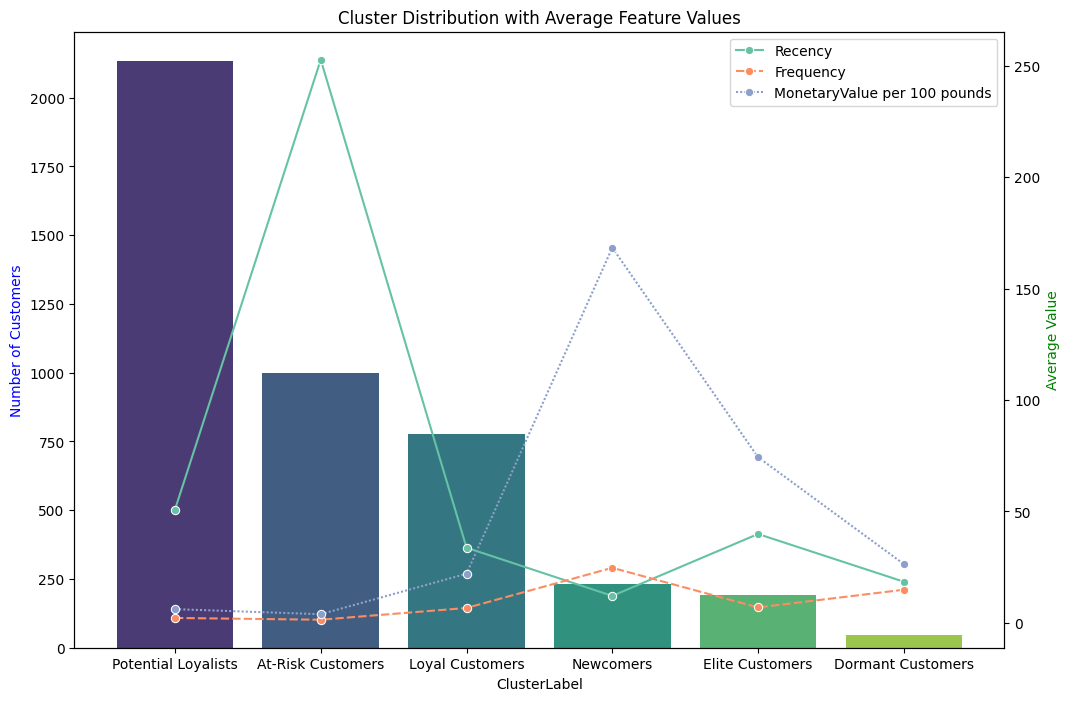

In [ ]:
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()
full_clustering_df["MonetaryValue per 100 pounds"] = full_clustering_df["MonetaryValue"] / 100.00
feature_means = full_clustering_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean()

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=None)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

plt.show()


In [ ]:
full_clustering_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'MonetaryValue']].mean().sort_values('MonetaryValue', ascending=False)


,Recency,Frequency,MonetaryValue
ClusterLabel,,,
Newcomers,12.11,24.72,16837.44
Elite Customers,39.89,6.94,7435.83
Dormant Customers,18.48,14.87,2638.69
Loyal Customers,33.74,6.69,2205.37
Potential Loyalists,50.85,2.21,617.15
At-Risk Customers,252.73,1.42,388.28


In [ ]:
summary = full_clustering_df.groupby('ClusterLabel')[['Recency','Frequency','MonetaryValue']].agg(['mean','count'])
summary.columns = [
    'Recency_mean','Recency_count',
    'Frequency_mean','Frequency_count',
    'Monetary_mean','Monetary_count'
]
summary = summary.reset_index()
summary.sort_values('Monetary_mean', ascending=False)


,ClusterLabel,Recency_mean,Recency_count,Frequency_mean,Frequency_count,Monetary_mean,Monetary_count
4,Newcomers,12.11,232,24.72,232,16837.44,232
2,Elite Customers,39.89,193,6.94,193,7435.83,193
1,Dormant Customers,18.48,46,14.87,46,2638.69,46
3,Loyal Customers,33.74,778,6.69,778,2205.37,778
5,Potential Loyalists,50.85,2133,2.21,2133,617.15,2133
0,At-Risk Customers,252.73,998,1.42,998,388.28,998
